# Software Contribution

In my software contribution I will build up the neural network for the MNIST dataset. 
Due to my birthdate my first focus is on performance, my second on explainibility and my third on data analysis.

In [1]:
#imort all necessary libraries

import tensorflow as tf 
import collections
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#Loading the MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


Size of training set: 60000
Size of test set: 10000
Number of digits in training data: [(0, 5923), (1, 6742), (2, 5958), (3, 6131), (4, 5842), (5, 5421), (6, 5918), (7, 6265), (8, 5851), (9, 5949)]


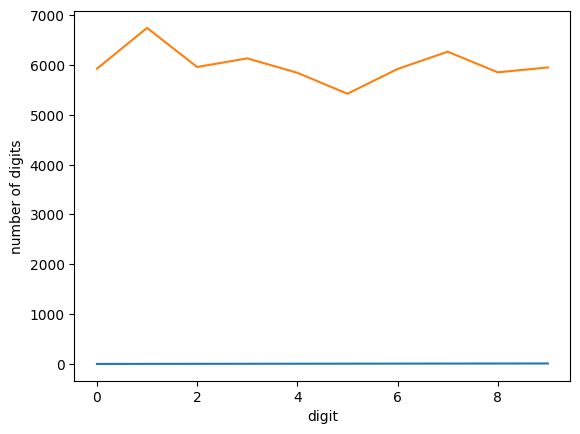

In [3]:
#Data Analysis

print('Size of training set:', len(x_train))
print('Size of test set:', len(x_test))

#Counts the number of digits
counter = collections.Counter(y_train)
print('Number of digits in training data:', sorted(counter.items()))

#Plots the number of digits
plt.plot(sorted(counter), sorted(counter.items()))
plt.xlabel('digit')
plt.ylabel('number of digits')
plt.show()

In [4]:
#Preparation of the data
x_train_normalized = x_train/255 
x_test_normalized = x_test/255 

x_train= x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)

In [27]:
# Definition of model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),

  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [28]:
# Definition of training parameters
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.2514 - accuracy: 0.9247 - val_loss: 0.1182 - val_accuracy: 0.9651
Epoch 2/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1059 - accuracy: 0.9673 - val_loss: 0.1121 - val_accuracy: 0.9653
Epoch 3/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0713 - accuracy: 0.9773 - val_loss: 0.0984 - val_accuracy: 0.9716
Epoch 4/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0539 - accuracy: 0.9830 - val_loss: 0.0836 - val_accuracy: 0.9761
Epoch 5/10
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0410 - accuracy: 0.9866 - val_loss: 0.0961 - val_accuracy: 0.9726
Epoch 6/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0958 - val_accuracy: 0.9734
Epoch 7/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.1000 - val_accuracy:

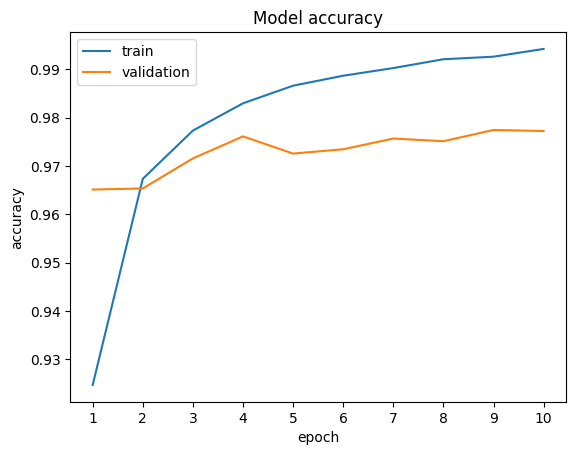

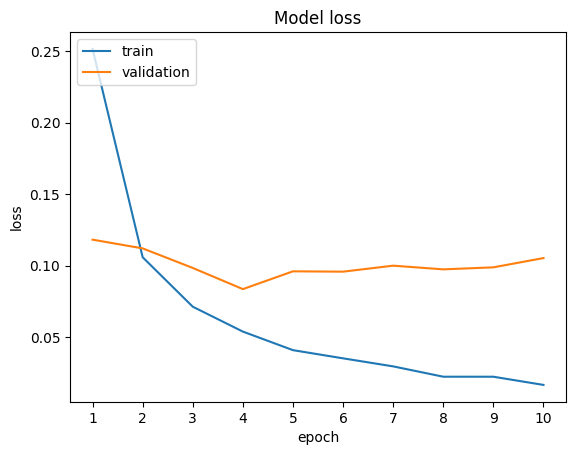

In [29]:
# Fit model on training data
history = model.fit(x_train, 
          y_train, 
          epochs=10, 
          steps_per_epoch=None,  
          shuffle=True, 
          callbacks=None,
          validation_split=0.15
         )

#Plot "Accuracy" and "Loss"
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.xticks(np.arange(len(history.history['accuracy'])), np.arange(1, len(history.history['accuracy'])+1))
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.xticks(np.arange(len(history.history['loss'])), np.arange(1, len(history.history['loss'])+1))
plt.show()




In [30]:
#Evaluate the accuracy of the model
_, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0985 - accuracy: 0.9772
Test accuracy: 0.9771999716758728


## Algorithm to identify optimum number of layers

In [23]:
# #imort all necessary libraries
# import tensorflow as tf 
# from keras.callbacks import CSVLogger
# import collections
# from collections import Counter
# import numpy as np
# import matplotlib.pyplot as plt 

# #Loading the MNIST dataset

# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# #Preparation of the data
# x_train_normalized = x_train/255 
# x_test_normalized = x_test/255 

# x_train= x_train_normalized.reshape(-1, 28, 28, 1)
# x_test = x_test_normalized.reshape(-1, 28, 28, 1)

# # Initialize lists to save the accuracy and loss of the different models 
# accuracy_training = []
# accuracy_validation = []
# loss_training = []
# loss_validation = []

# # i = number of layers
# i = 1

# #for-loop to initialize the model, to fit it on the data and to save the results
# for t in range(10):

#     model = tf.keras.Sequential()
#     model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#     for s in range(i):
#             model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#     model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    
#     model.compile(optimizer='Adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
    
#     history = model.fit(x_train, 
#           y_train, 
#           epochs=10, 
#           steps_per_epoch=None,  
#           shuffle=True, 
#           validation_split=0.15
#          )
    
#     i+=1
#     print(i)

# #Saving the results of training and validation to the initialized lists
#     accuracy_training.append(history.history['accuracy'][4]) 
#     accuracy_validation.append(history.history['val_accuracy'][4])
#     loss_training.append(history.history['loss'][4]) 
#     loss_validation.append(history.history['val_loss'][4])


# #Plot "Accuracy" of different models
# plt.plot(accuracy_training, label= 'Training')
# plt.plot(accuracy_validation, label='Validation')
# legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
# plt.xlabel('Number of layers')
# plt.ylabel('Accuracy')
# plt.title('Model accuracy')
# plt.xticks(np.arange(len(accuracy_training)), np.arange(1, len(accuracy_training)+1))
# plt.show()


# #Plot "Loss" of different models
# plt.plot(loss_training, label= 'Training')
# plt.plot(loss_validation, label='Validation')
# legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
# plt.xlabel('Number of layers')
# plt.ylabel('Loss')
# plt.title('Model loss')
# plt.xticks(np.arange(len(accuracy_training)), np.arange(1, len(accuracy_training)+1))
# plt.show()
